### 1. Import Libraries



In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### 2. Read data from the advertising.csv file and set it to a data frame called advertising.

In [3]:
adv = pd.read_csv('advertising.csv')

### 3. Show first 5 rows from the dataset

In [4]:
adv.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### 4. Use info() and describe() methods to get information about the dataset

In [5]:
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [6]:
adv.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


### 5. Use seaborn to create a histogram of the Age column.

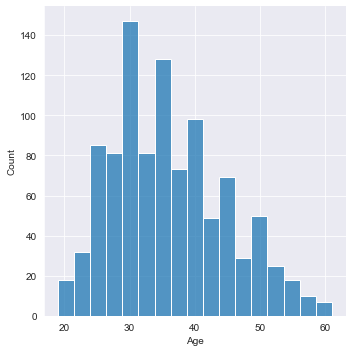

In [7]:
sns.set_style('darkgrid')
sns.displot(adv['Age'])

### 6. Use seaborn to create a jointplot showing Area Income versus Age.

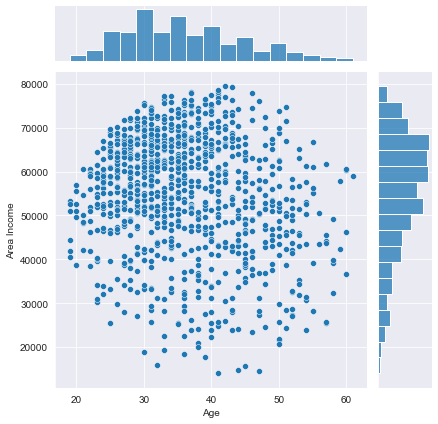

In [8]:
sns.jointplot(data=adv, x='Age', y='Area Income')

### 7. Use seaborn to create a jointplot  showing the kde distributions of Daily Time Spent on Site versus Age.

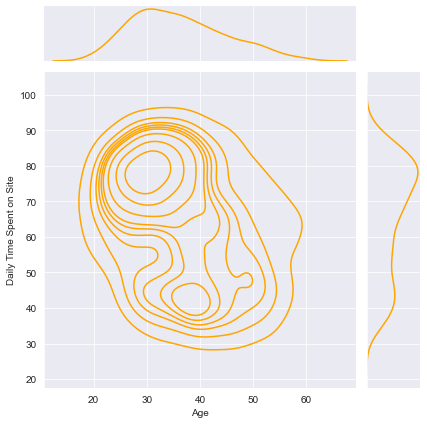

In [9]:
sns.jointplot(data=adv, x='Age', y='Daily Time Spent on Site', color='orange', kind='kde')

### 8. Use seaborn to create a jointplot of Daily Time Spent on Site versus Daily Internet Usage.

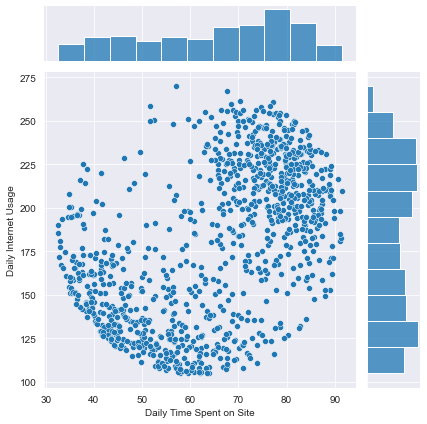

In [10]:
sns.jointplot(data=adv, x='Daily Time Spent on Site', y='Daily Internet Usage')

### 9. Use seaborn to create a pairplot with the hue defined by the Clicked on Ad column feature.

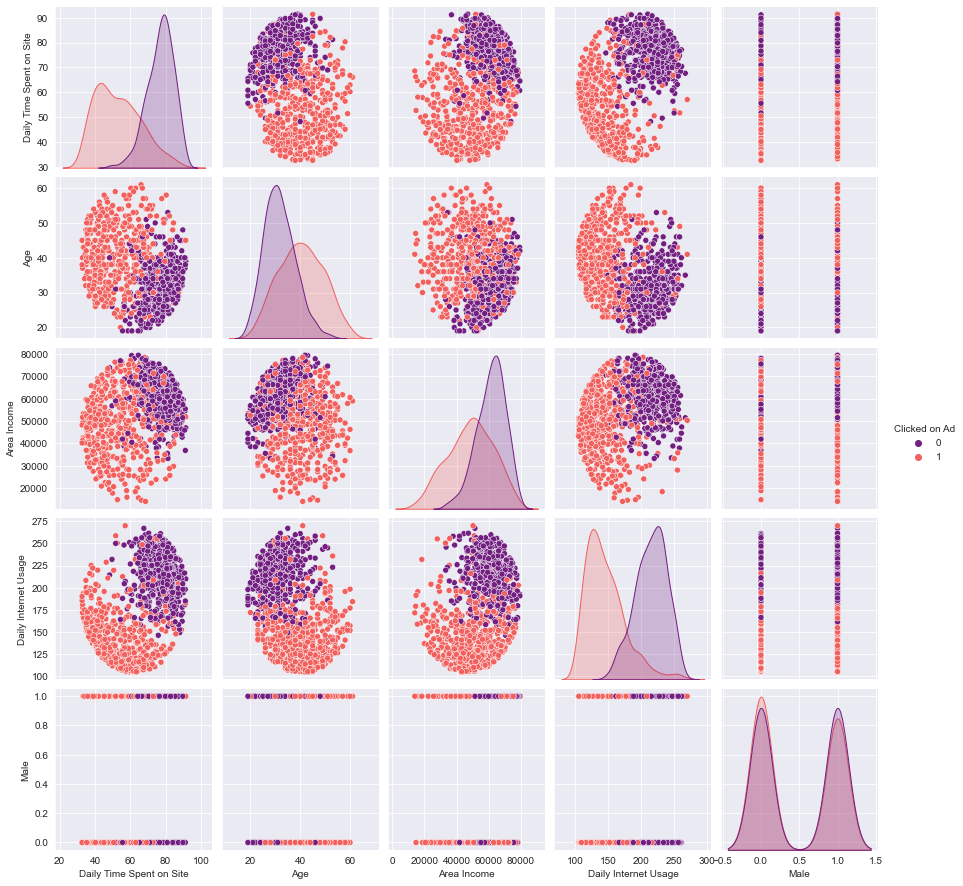

In [11]:
sns.pairplot(adv, hue='Clicked on Ad', palette='magma')

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/opt/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


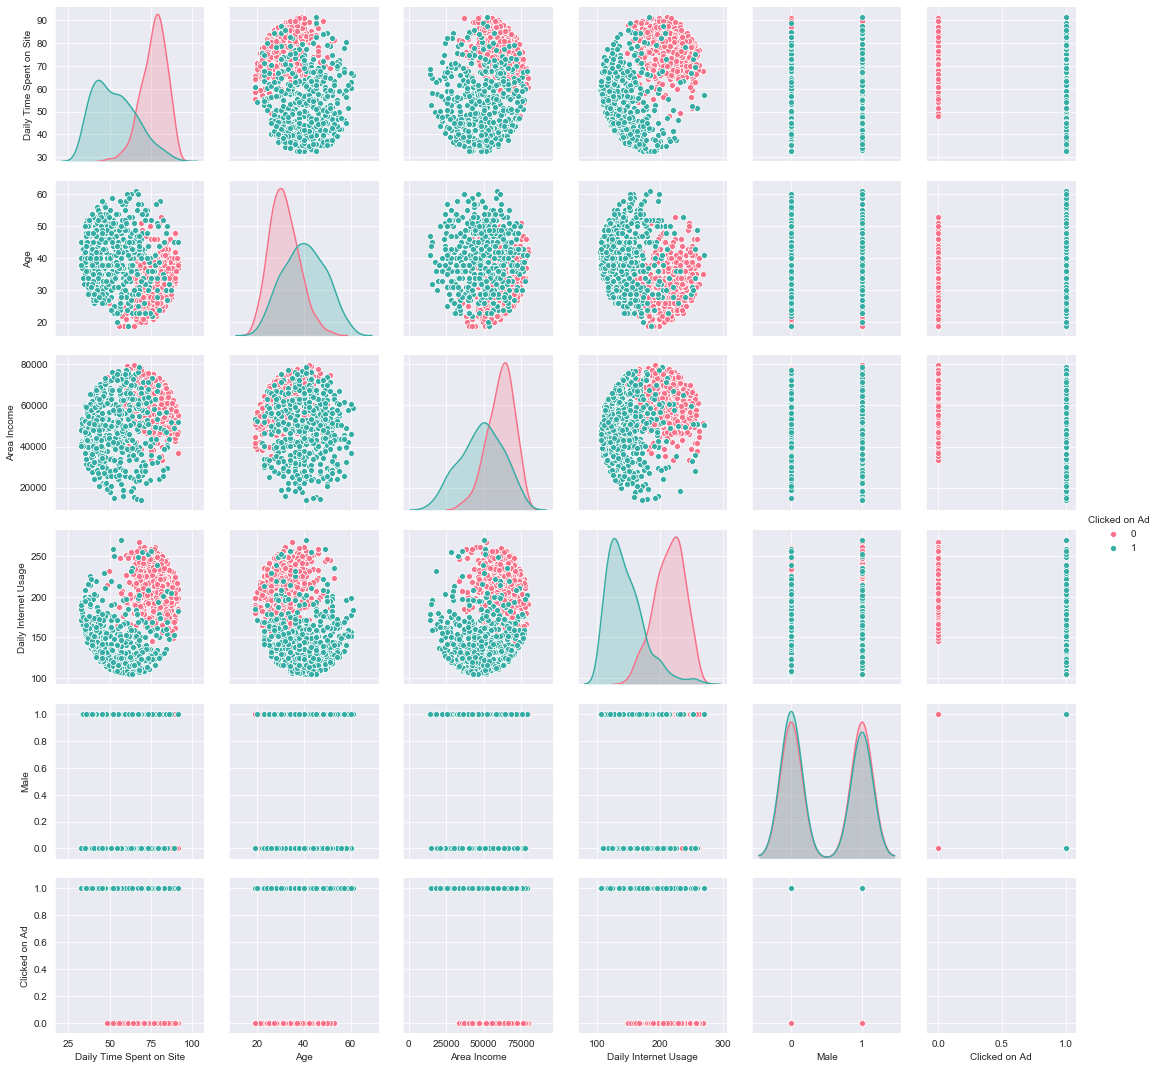

### 10. Split the data into training set and testing set using train_test_split.

In [12]:
X = adv.drop(['Ad Topic Line', 'City', 'Country', 'Clicked on Ad', 'Timestamp'], axis=1)
y = adv['Clicked on Ad']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=100)

### 11. Train and fit a logistic regression model on the training set.

In [13]:
from sklearn.linear_model import LogisticRegression
lrm = LogisticRegression()
lrm.fit(X_train, y_train)

LogisticRegression()

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

### 12. Predict values for the testing data.

In [14]:
predictions = lrm.predict(X_test)

### 13. Create a classification report for the model.

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90       196
           1       0.94      0.86      0.90       204

    accuracy                           0.90       400
   macro avg       0.90      0.90      0.90       400
weighted avg       0.90      0.90      0.90       400



              precision    recall  f1-score   support

           0       0.86      0.97      0.91       143
           1       0.96      0.86      0.91       157

    accuracy                           0.91       300
   macro avg       0.91      0.91      0.91       300
weighted avg       0.92      0.91      0.91       300



In [16]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predictions)

array([[184,  12],
       [ 28, 176]])